In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import xarray as xr
import h5py
from tqdm import tqdm
import time

from RPLB_acc_NoSTC import RPLB_acc_NoSTC
from RPLB_acc_SC_2D import RPLB_acc_SC_2D
from RPLB_acc_NoSTCApril_2D import RPLB_acc_NoSTCApril_2D
from RPLB_acc_SCApril_2D import RPLB_acc_SCApril_2D

In [2]:
c = 2.9979e8
lambda_0 = 1800e-9  # central wavelength
omega_0 = 2*np.pi*c/lambda_0

s = 57.5
tau_FWHM = np.sqrt(2)*s*np.sqrt(2**(2/(s+1))-1)/omega_0
tau_0 = s*np.sqrt(np.exp(2/(s+1))-1)/omega_0

NA = 0.1
half_angle = np.arcsin(NA)
a = 2/(np.sin(half_angle)*np.tan(half_angle)*2*np.pi/lambda_0)  # set confocal parameter
w_0 = 2/(np.tan(half_angle)*2*np.pi/lambda_0)  # set beam waist
z_R = (omega_0*w_0**2)/(2*c)
print('{0:.3g}'.format(1e6*w_0))

P = 50e12  # FL power
Psi_0 = 0.0*np.pi
t_0 = -10*tau_0

5.7


37286936.48344245
41717507.17191255
34876979.22745734


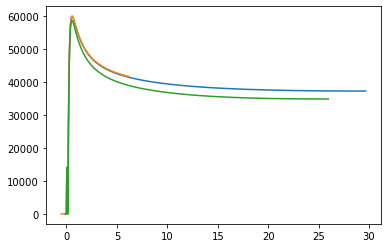

In [3]:
# test on-axis without SC

t, temp, temp, KE = RPLB_acc_NoSTC(lambda_0, tau_0, w_0, P, Psi_0, 0.0, t_0, 0.0, 0.0)
t_SC, temp, temp, temp, temp, KE_SC = RPLB_acc_SC_2D(lambda_0, tau_0, w_0, P, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
t_April_SC, temp, temp, temp, temp, KE_April_SC = RPLB_acc_SCApril_2D(lambda_0, s, a, P, 0.0, 0.0, 0.0, t_0, 0.0, 0.0, 0.0, 0.0)

print(KE[-1])
print(KE_SC[-1])
print(KE_April_SC[-1])

plt.plot(t/1e-12, KE/1e3)
plt.plot(t_SC/1e-12, KE_SC/1e3)
plt.plot(t_April_SC/1e-12, KE_April_SC/1e3)

16039052.223312499
13670632.079022897


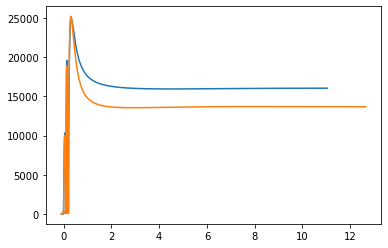

In [9]:
# test off-axis without SC

x_0 = 0.2*w_0

t_April, temp, temp, temp, temp, KE_April = RPLB_acc_NoSTCApril_2D(lambda_0, s, a, P, 0.0, t_0, 0.0, x_0, 0.0)
t_April_SC, temp, temp, temp, temp, KE_April_SC = RPLB_acc_SCApril_2D(lambda_0, s, a, P, 0.0, 0.0, 0.0, t_0, 0.0, x_0, 0.0, 0.0)

print(KE_April[-1])
print(KE_April_SC[-1])

plt.plot(t_April/1e-12, KE_April/1e3)
plt.plot(t_April_SC/1e-12, KE_April_SC/1e3)